#### Name - Anish Kumar Barik
#### Redg. no. - 24MDT0170
#### Course Code: PMDS505P
#### Assessment No: 4
### Slot No: E1+TE1


In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("liver_patient.csv")

In [4]:
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,liver_disease
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,0
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [5]:
df = df.drop(columns=['Age','Gender'],axis=1)

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_df = scaler.fit_transform(df)

In [7]:
from sklearn.model_selection import train_test_split

X = scaled_df[:,:-1]
y = scaled_df[:,-1:]
 
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
lr.fit(x_train,y_train.ravel())
y_pred = lr.predict(x_test)
lr_acc = accuracy_score(y_test,y_pred)
print(lr_acc)

0.6666666666666666


In [9]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [10]:
X, y = make_classification(n_samples=200,
                           n_features=3,
                           n_informative=3,
                           n_redundant=0,
                           n_clusters_per_class=1,
                           class_sep=1.5,
                           random_state=42)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)

logisticR = LogisticRegression()
logisticR.fit(X_train,y_train)

y_pred = logisticR.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print(f"Accuracy: {acc}")

coef_ = logisticR.coef_[0]
intercept_ = logisticR.intercept_[0]
print(f"Coefficients: {coef_}")
print(f"intercept: {intercept_}")

Accuracy: 0.95
Coefficients: [ 3.361331   -0.16391339  0.53752891]
intercept: 0.9694267626059678


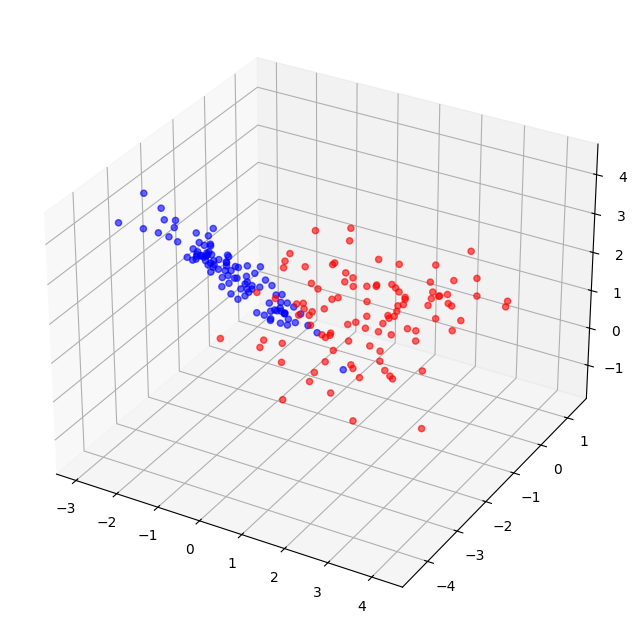

In [11]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[y==0,0], X[y==0,1], X[y==0,2], color='blue',label='Class 0', alpha=0.6)
ax.scatter(X[y==1,0], X[y==1,1], X[y==1,2], color='red',label='Class 1', alpha=0.6)

plt.show()

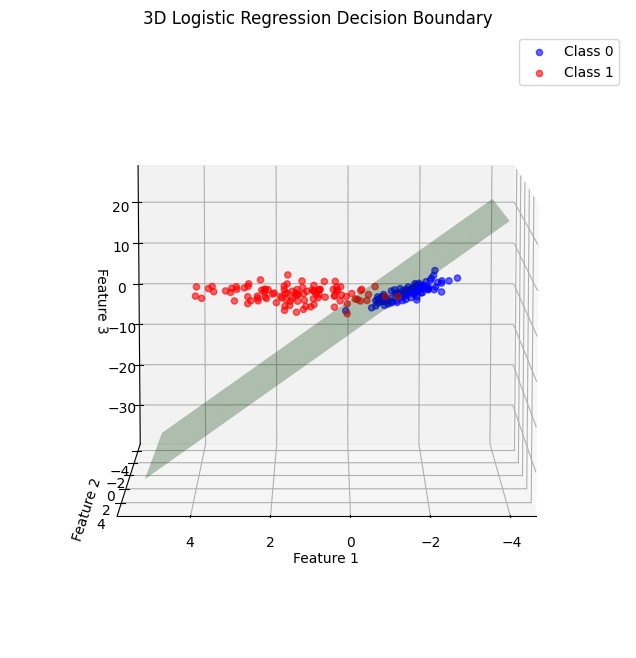

In [12]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[y==0,0], X[y==0,1], X[y==0,2], color='blue',label='Class 0', alpha=0.6)
ax.scatter(X[y==1,0], X[y==1,1], X[y==1,2], color='red',label='Class 1', alpha=0.6)

x_min, x_max = X[:, 0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:, 0].min() - 1, X[:,0].max() + 1

xx, yy = np.meshgrid(np.linspace(x_min,x_max,50), np.linspace(y_min, y_max, 50))
zz = -(coef_[0] * xx + coef_[1] * yy + intercept_) / coef_[2]
ax.plot_surface(xx, yy, zz, color='green', alpha=0.3, edgecolor='none')
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 3")
ax.set_title("3D Logistic Regression Decision Boundary")
ax.legend()
ax.view_init(elev=8, azim=90)
plt.show()

In [13]:
new_df = df.iloc[:,0:2]
new_df['liver_disease'] = df['liver_disease']
new_df

,Total_Bilirubin,Direct_Bilirubin,liver_disease
0,0.7,0.1,1
1,10.9,5.5,1
2,7.3,4.1,1
3,1.0,0.4,1
4,3.9,2.0,1
...,...,...,...
578,0.5,0.1,0
579,0.6,0.1,1
580,0.8,0.2,1
581,1.3,0.5,1


In [14]:
MM = MinMaxScaler(feature_range=(0,1))
MM_df = MM.fit_transform(new_df)

In [15]:
X = MM_df[:,:-1]
y = MM_df[:,-1:]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)

lr3 = LogisticRegression()
lr3.fit(X_train,y_train.ravel())

y_pred = lr3.predict(X_test)
print(f"Logistic Regression Accuracy with two features: {accuracy_score(y_test,y_pred)}")

Logistic Regression Accuracy with two features: 0.6666666666666666


In [16]:
coef = lr3.coef_[0]
intercept = lr3.intercept_[0]

print(coef)
print(intercept)

[1.34070861 2.65797719]
0.7894551234213822


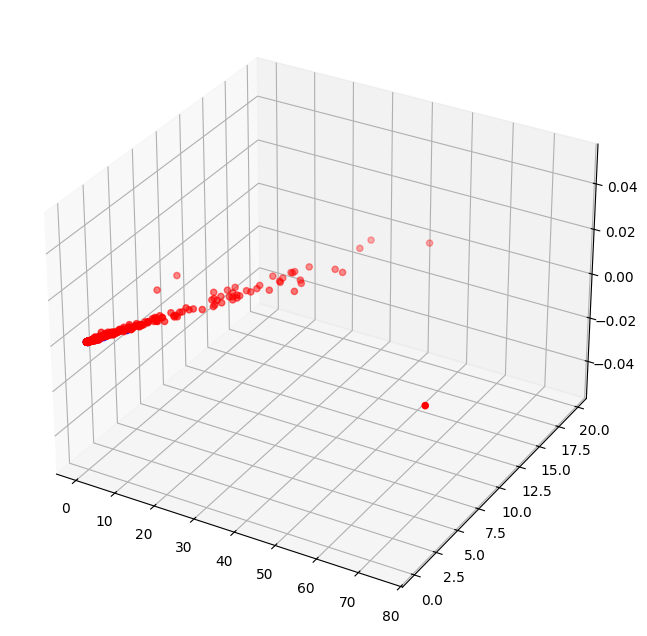

In [17]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(new_df.loc[new_df['liver_disease'] == 0, 'Total_Bilirubin'], 
           new_df.loc[new_df['liver_disease'] == 0, 'Direct_Bilirubin'], 
           color='blue', label='Class 0')

ax.scatter(new_df.loc[new_df['liver_disease'] == 1, 'Total_Bilirubin'], 
           new_df.loc[new_df['liver_disease'] == 1, 'Direct_Bilirubin'], 
           color='red', label='Class 1')

plt.show()

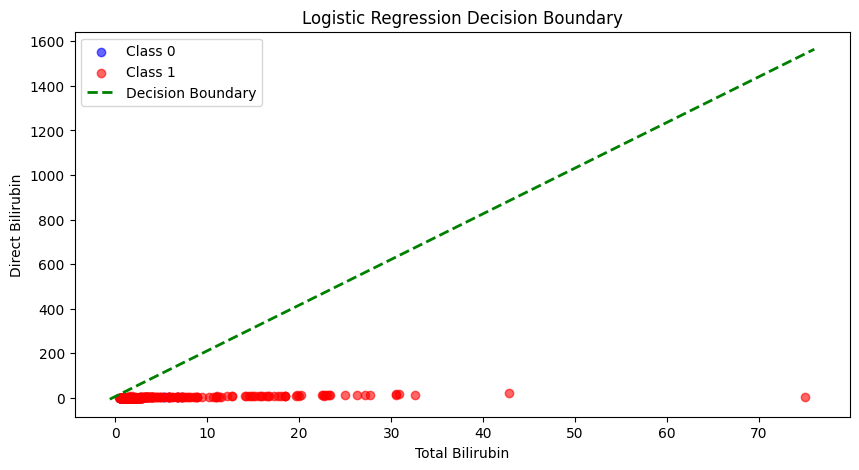

In [18]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

ax.scatter(new_df.loc[new_df['liver_disease'] == 0, 'Total_Bilirubin'], 
           new_df.loc[new_df['liver_disease'] == 0, 'Direct_Bilirubin'], 
           color='blue', label='Class 0', alpha=0.6)

ax.scatter(new_df.loc[new_df['liver_disease'] == 1, 'Total_Bilirubin'], 
           new_df.loc[new_df['liver_disease'] == 1, 'Direct_Bilirubin'], 
           color='red', label='Class 1', alpha=0.6)

x_min, x_max = new_df['Total_Bilirubin'].min() - 1, new_df['Total_Bilirubin'].max() + 1
x_vals = np.linspace(x_min, x_max, 100)

y_vals = -(coef_[0] * x_vals + intercept_) / coef_[1]

ax.plot(x_vals, y_vals, color='green', linestyle='--', linewidth=2, label="Decision Boundary")

ax.set_xlabel("Total Bilirubin")
ax.set_ylabel("Direct Bilirubin")
ax.set_title("Logistic Regression Decision Boundary")
ax.legend()
plt.show()


In [19]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))
    
class Logistic_Regression:
    def __init__(self,lr=0.001,epcohs=100):
        self.coef_=None
        self.intercept_=None
        self.weights = None
        self.lr=lr
        self.epochs=epcohs
        
    def fit(self,X_train,y_train):
        X_train = np.insert(X_train,0,1,axis=1)
        self.weights = np.zeros(X_train.shape[1])
        
        for i in range(self.epochs):
            y_hat = sigmoid(np.dot(X_train,self.weights))
            self.weights=self.weights + self.lr*np.dot((y_train-y_hat),X_train)/X_train.shape[0]
            
        self.coef_=self.weights[1:]
        self.intercept_=self.weights[0]
        
    def predict(self,X_test):
        linear_pred = np.dot(X_test,self.coef_)+self.intercept_
        y_pred = sigmoid(linear_pred)
        class_pred = [0 if y<=0.5 else 1 for y in y_pred]
        return class_pred

In [20]:
df2 = df.copy()

In [21]:
from sklearn.preprocessing import MinMaxScaler
 
scaler = MinMaxScaler(feature_range=(0,1))
scaled_df2 = scaler.fit_transform(df2)

In [22]:
from sklearn.model_selection import train_test_split

X = scaled_df2[:,:-1]
y = scaled_df2[:,-1:]
 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [23]:
my_lr = Logistic_Regression()
my_lr.fit(X_train,y_train.ravel())
y_pred = my_lr.predict(X_test)
acc_my_lr = accuracy_score(y_test,y_pred)
print(acc_my_lr)

0.6666666666666666
